<a href="https://colab.research.google.com/github/sarahaptumich/capstone/blob/Sihyun/data_exploration_judges2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/School/MADS/SIADS 699 : Capstone/Team

/content/drive/MyDrive/School/MADS/SIADS 699 : Capstone/Team


In [3]:
#!git pull   #check that git us up to date
#!git checkout -b shaptonstall # create a new branch

#!git push origin shaptonstall #commit changes to my branch

In [4]:
# to commit to github
#!git status # check untracked files
#!git add {filename} # add the files
#!git config --global user.email "sarahapt@umich.edu"
# !git commit

In [5]:
pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=fc690f5ce097cbb29dcf86cd0db03aa9f5bf3b62e2276a2248e3f74e30ba9412
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


In [6]:
pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 11.2 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659681 sha256=5081f8e45a2892a6d85a06537f252a69c294f366d4f0ca45d87b477f4895b4df
  Stored in directory: /root/.cache/pip/wheels/53/ec/0d/0b294c02d8c4e9e80afea58839f2c1b4706770594bc99ec045
Successfully built semopy


Import libraries

In [7]:
import pandas as pd
import numpy as np
import altair as alt
import re
from datetime import datetime, timedelta
from sklearn.decomposition import PCA, KernelPCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from factor_analyzer import Rotator
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)
from semopy import Model
from semopy import Optimizer
from semopy.inspector import inspect
from semopy import gather_statistics
import semopy
from semopy import ModelMeans

In [8]:
!ls

'[2023.07.08] Cypher Minds Data.xlsx'
 AIST++.pdf
 annotations.csv
 annotations.gsheet
 bboy_frame_labels2.csv
 bboy_frame_labels.csv
 bboy_frame_labels.gsheet
 Bboy_frames
'B-Boy Hong 10 vs. B-Boy Phil Wizard _ Final _ Red Bull BC One 2023 World Final Paris.mp4'
'BEST BREAKING HIGHLIGHTS of Red Bull BC One 2023 World Final Paris.mp4'
 deep_sort
 frame_labels.csv
 groovenet-ml4c-2017.pdf
'judge_score_normalized(Vincent)'
 Judges.gsheet
 posenet_model.json
 posenet_model.zip
 posenet.tflite
 preprocessed_frames
'Settle it in the Cypher - Sports Analytics and Data Technology for Competitive Breaking.docx'
 test_bboy_frames
 test_bboy.mov
 test_labels.csv
 test_labels.gsheet
 tom_jerry
 train_bboy_frames
 train_bboy.MOV
 train_labels.csv
 train_labels.gsheet
'Trivium Data Analysis.xlsx'
 video_frames
 videoplayback.mp4
'Webscraping (Mar 13).xlsx'
 Webscraping.xlsx
 Yolov3
 yolov3.weights


In [9]:
# Load all sheets into a dictionary of DataFrames
webscraping = pd.read_excel('Webscraping.xlsx', sheet_name=None)



In [10]:
webscraping.keys()
# webscraping['Events and8']

dict_keys(['Events and8', 'Events WDSF', 'Battles Trivium', 'Battles and8 Threefold', 'Battles and8 Single Slider', 'Battles and8 Round by Round', 'Battles and8 Traditional', 'Research Questions', 'Notes', 'Notes Columns'])

Events details

In [9]:
eventsAnd8=webscraping['Events and8'][1:].copy()
new_header= eventsAnd8.iloc[0]
eventsAnd8=eventsAnd8.drop(1)
eventsAnd8.columns = new_header
eventsAnd8.rename(columns={'Name':'Event'}, inplace=True)
eventsAnd8.drop_duplicates(subset=['Event'], inplace=True)

eventsWDSF = webscraping['Events WDSF'][1:].copy()
new_header = eventsWDSF.iloc[0]
eventsWDSF = eventsWDSF.drop(1)
eventsWDSF.columns = new_header
eventsWDSF.rename(columns={'Name': 'Event'}, inplace=True)
eventsWDSF.drop_duplicates(subset=['Event'], inplace=True)

combined_events = pd.concat([eventsAnd8, eventsWDSF], ignore_index=True)


In [10]:
combined_events

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:102: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  pd.Series(non_null_values)


1,Date,Event,Category,Stage,Link,Format,Scraped
0,2023-07-16 00:00:00,Campionato Italiano di Categoria Breaking FIDS,1vs1 BBoy 12-15 C,32 @ Preselection,https://and8.dance/en/stats/reports/4459/1790/...,NaN,no
1,2023-07-08 00:00:00,German Breaking Championship 2023,1vs1 B-Girls,21 @ Preselection,https://and8.dance/en/stats/reports/4437/1726/...,NaN,no
2,2023-06-30 00:00:00,Munich Mash Streetdance Battles,2vs2 Breaking,Top 8 KnockOut,https://and8.dance/en/stats/reports/4431/1778/r/,NaN,no
3,2023-06-25 00:00:00,JDSF Breaking Block Battle Series 2023 – Kansai,1vs1 Junior B-Girl,5 @ Preselection,https://and8.dance/en/stats/reports/4444/1728/...,NaN,no
4,2023-06-24 00:00:00,The Movement ARENA 2023,1vs1 B-Girl (SBL),5 @ Preselection,https://and8.dance/en/stats/reports/4281/1560/...,NaN,no
...,...,...,...,...,...,...,...
266,2018.10.07,WDSF Youth Olympic Games - Buenos Aires,NaN,NaN,https://worlddancesport.org/Event/Competition/...,NaN,and8
267,2018.05.20,WDSF World Championship - Kawasaki,NaN,NaN,https://worlddancesport.org/Event/Competition/...,NaN,and8
268,2017.12.02,WDSF Asian Qualifier - Taipei,NaN,NaN,https://worlddancesport.org/Event/Competition/...,NaN,and8
269,2017.10.22,WDSF European Qualifier - Essen,NaN,NaN,https://worlddancesport.org/Event/Competition/...,NaN,and8


Threefold Battles

In [11]:
#threefold battles
threefold = webscraping['Battles and8 Threefold']
threefold.rename(columns={'Unnamed: 0':'Event', 'Unnamed: 1': 'Category'}, inplace=True)
threefold[['Event', 'Category']] = threefold[['Event', 'Category']].fillna(method='ffill')
threefold.head(2)

,Event,Category,breaker 1,breaker 2,winner,battle rounds,number of judges,breaker 1 round wins,breaker 2 round wins,breaker 1 vote count,...,r3j7arti,r3j7inte,r3j8over,r3j8phys,r3j8arti,r3j8inte,r3j9over,r3j9phys,r3j9arti,r3j9inte
0,Campionato Italiano di Categoria Breaking FIDS...,1vs1 BBoy 12-15 C Top 16 KnockOut,Baruzzo,Elpablix,Baruzzo,3,3,2,1,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Campionato Italiano di Categoria Breaking FIDS...,1vs1 BBoy 12-15 C Top 16 KnockOut,Yoga,Faby,Faby,2,3,0,2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
pd.merge(threefold, combined_events[['Date', 'Event', 'Format']], on='Event')['Format'].unique()


array([nan], dtype=object)

Trivium Battles

In [11]:
test_trivium=webscraping['Battles Trivium']
test_trivium.rename(columns={'Unnamed: 0':'Event', 'Unnamed: 1': 'Category'}, inplace=True)
test_trivium[['Event', 'Category']]= test_trivium[['Event', 'Category']].fillna(method='ffill') # fill values by Event's name

In [12]:
test_trivium.columns

Index(['Event', 'Category', 'breaker 1 (red)', 'breaker 2 (blue)', 'winner',
       'battle rounds', 'number of judges', 'breaker 1 round wins',
       'breaker 2 round wins', 'breaker 1 vote count',
       ...
       'r5j8but2', 'r5j9over', 'r5j9tech', 'r5j9vari', 'r5j9perf', 'r5j9musi',
       'r5j9crea', 'r5j9pers', 'r5j9but1', 'r5j9but2'],
      dtype='object', length=425)

In [13]:
test_trivium

,Event,Category,breaker 1 (red),breaker 2 (blue),winner,battle rounds,number of judges,breaker 1 round wins,breaker 2 round wins,breaker 1 vote count,...,r5j8but2,r5j9over,r5j9tech,r5j9vari,r5j9perf,r5j9musi,r5j9crea,r5j9pers,r5j9but1,r5j9but2
0,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Ami,671,671,3,9,1,2,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Sunny,Anti,Anti,3,9,1,2,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Anti,671,671,3,9,0,3,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Ami,Sunny,Ami,3,9,3,0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,671,Ayumi,671,2,9,2,0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,Stiv,Rerunn,Rerunn,2,5,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1522,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,Piccolo,Rerunn,Rerunn,2,5,0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1523,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,Piccolo,D-Matt,D-Matt,2,5,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1524,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,Stiv,D-Matt,D-Matt,2,5,0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create Dataframe -'Event', 'Category', 'Round number','Name', 'Overall', 'Technique', 'Variety', 'Performance', 'Musicality', 'Creativity', 'Personality'

Dictionary



*   **Event** = name of event (string)
*   **Category** = name of round (string)
*   **Round Number** = the number of each round (r1 means the first round for battle)
*   **Name** = name of judge (string)
*   **Overall** = Sum of judge scores (float)
*   **Technique** = judge scores for techique (float)
*   **Variety** = judge scores for variety (float)
*   **Performance** = judge scores for performance (float)
*   **musicalirty** = judge scores for musicality (float)
*   **Creativity** = judge scores for creativity (float)
*   **Personality** = judge scores for personality (float)





In [76]:
columns = ['Event', 'Category', 'Round_Number','Name', 'Winner_In_Round', 'Overall', 'Technique', 'Variety', 'Performance', 'Musicality', 'Creativity', 'Personality']
judge_df = pd.DataFrame(columns=columns)

In [77]:
judge_df

,Event,Category,Round_Number,Name,Winner_In_Round,Overall,Technique,Variety,Performance,Musicality,Creativity,Personality


Group by Event

In [101]:
event_lst = list(test_trivium['Event'].unique())

index_num = 0

total_judges_lst = [] # Save the entire judges

total_breakers_lst = [] # Save the entire judges


for event in event_lst:
  temp_lst = [] # empty list
  temp_df = test_trivium[test_trivium['Event']==event] # Take dataframe by each event

  category_lst = temp_df['Category'].unique()
  #print(category_lst)

  for category in category_lst:
    cat_temp_df = temp_df[temp_df['Category']==category] # Take dataframe by category in each event
    # print(cat_temp_df['battle rounds'].unique())
    # print('')
    num_judges = cat_temp_df['number of judges'].iloc[0] # number of judges
    judges_lst = list(cat_temp_df.filter(like="judge ").iloc[0, :num_judges]) # Judges list

    total_judges_lst = list(set(total_judges_lst + judges_lst))

    num_breakers = 2 # number of breakers
    breakers_lst = list(cat_temp_df.filter(like="breaker ").iloc[0, :num_breakers]) # breakers list
    total_breakers_lst = list(set(total_breakers_lst + breakers_lst))

    num_round = cat_temp_df['battle rounds'].iloc[0] # number of round

    for i in range(num_round):

      for j in range(num_judges):
        temp_lst.append(event)
        temp_lst.append(category)
        round = "r"+str(i+1) # Round number
        temp_lst.append(round)

        temp_lst.append(judges_lst[j])

        # Score list - Overall, Tech, Variety, Performance, Musicality, Creative, Personality
        s_lst = list(cat_temp_df.filter(like=round).iloc[0, 0+9*j:7+9*j])

        # Append winner breaker by Overall score
        # if Overall > 0, blue(breaker2)
        temp_lst.append(np.where(s_lst[0]>0, str(breakers_lst[1]), str(breakers_lst[0])))
        # print(temp_lst+list(cat_temp_df.filter(like="r"+str(i+1)).iloc[0, 0+9*j:7+9*j]))
        judge_df.loc[index_num] = temp_lst+ s_lst
        index_num = index_num + 1

        temp_lst = [] # reset the list

#temp_df



In [102]:
judge_df

,Event,Category,Round_Number,Name,Winner_In_Round,Overall,Technique,Variety,Performance,Musicality,Creativity,Personality
0,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r1,Kujo,671,14.93,6.2,1.47,6.4,-3.07,2.2,1.73
1,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r1,Lazylegz,Ami,-10.67,0.0,-1.33,-4.0,0.00,-4.0,-1.33
2,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r1,Valentine,Ami,-0.40,0.0,0.00,-2.0,1.60,0.0,0.00
3,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r1,Spin,671,6.40,3.2,0.00,3.2,0.00,0.0,0.00
4,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r1,Octopus,Ami,-4.47,4.6,-1.87,-3.0,-1.60,-2.6,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2398,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,r2,Jeskilz,Stiv,-4.93,-2.0,0.00,-2.0,-0.93,0.0,0.00
2399,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,r2,Moy,Piccolo,4.00,2.0,0.00,2.0,0.00,0.0,0.00
2400,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,r2,Narumi,Stiv,-5.67,0.0,0.00,-1.0,-1.73,-0.8,-2.13
2401,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,r2,Renegade,Piccolo,2.00,0.0,0.00,2.0,0.00,0.0,0.00


In [19]:
total_judges_lst.sort()

In [82]:
#total_judges_lst

In [83]:
#total_breakers_lst

In [24]:
event_lst

['WDSF BfG World Series - Kitakyushu 2023 - Japan',
 'WDSF European Breaking Championships 2022 - Manchester',
 'WDSF World Championship 2022 - Seoul',
 'The IWGA World Games 2022',
 'FISE Montpellier 2022 - WDSF Breaking for Gold World Series',
 'WDSF World Championship 2021 - Paris',
 'WDSF European Breaking Championships 2021 - Sochi',
 'World Urban Games 2019',
 '2019 JDSF',
 'WDSF World Breaking Championship 2019 - Nanjing',
 'FISE Hiroshima 2019',
 'BAYOG 2018',
 'World Youth Breaking Championships 2018',
 'Japan Break Dance Championships 2018',
 'YOG Continental Qualifier 2017 Asia & Oceania',
 'YOG Continental Qualifier 2017 Europe',
 '2017 BreakSM',
 'YOG Continental Qualifier 2017 USA',
 'BOTY Central Europe 2017',
 'WDSF Pan American Qualifier 2017 - Philadelphia']

**Judge Profiles**


---
What is each judge's mean, median, range, standard deviation of scores submitted?



In [84]:
judge_df.columns

Index(['Event', 'Category', 'Round_Number', 'Name', 'Winner_In_Round',
       'Overall', 'Technique', 'Variety', 'Performance', 'Musicality',
       'Creativity', 'Personality'],
      dtype='object')

In [97]:
events_lst = list(judge_df['Event'].unique())
cols1 = ['Overall', 'Technique', 'Variety', 'Performance', 'Musicality', 'Creativity', 'Personality']
judges_lst
for event in events_lst:
  # for only submitted
  event_temp_df = judge_df[judge_df['Event']==event]
  # event_temp_df = event_temp_df[cols1]

  print("The name of event : ", event)
  print('')
  #print(event_temp_df.groupby('Name').agg(['median', 'mean', 'std']).reset_index())


The name of event :  WDSF BfG World Series - Kitakyushu 2023 - Japan

The name of event :  WDSF European Breaking Championships 2022 - Manchester

The name of event :  WDSF World Championship 2022 - Seoul

The name of event :  The IWGA World Games 2022

The name of event :  FISE Montpellier 2022 - WDSF Breaking for Gold World Series

The name of event :  WDSF World Championship 2021 - Paris

The name of event :  WDSF European Breaking Championships 2021 - Sochi

The name of event :  World Urban Games 2019

The name of event :  2019 JDSF

The name of event :  WDSF World Breaking Championship 2019 - Nanjing

The name of event :  FISE Hiroshima 2019

The name of event :  BAYOG 2018

The name of event :  World Youth Breaking Championships 2018

The name of event :  Japan Break Dance Championships 2018

The name of event :  YOG Continental Qualifier 2017 Asia & Oceania

The name of event :  YOG Continental Qualifier 2017 Europe

The name of event :  2017 BreakSM

The name of event :  YOG Co

In [103]:
# Want to show one event to be clearer

event = events_lst[0] # set the event's name

event_temp_df = judge_df[judge_df['Event']==event]
# event_temp_df = event_temp_df[cols1]

# Overall > 0, blue
event_temp_df['color'] = np.where(event_temp_df['Overall']>0, 'blue', 'red')

event_temp_df['Overall'].abs()

print("The name of event : ", event)
print('')

# for col in cols1[2:]:
#   positive_event_temp_df = event_temp_df.where(event_temp_df[col]>0)[['Name', col]] # red team
#   # print(positive_event_temp_df.groupby('Name').agg(['median', 'mean', 'std']).reset_index())

#   negative_event_temp_df =event_temp_df.where(event_temp_df[col]<0)[['Name', col]] # blue team
#   # print(negative_event_temp_df.groupby('Name').agg(['median', 'mean', 'std']).reset_index())


The name of event :  WDSF BfG World Series - Kitakyushu 2023 - Japan



<ipython-input-103-d7a5c545171f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_temp_df['color'] = np.where(event_temp_df['Overall']>0, 'blue', 'red')


In [58]:
# # Want to show one event to be clearer

# event = events_lst[1]

# event_temp_df = judge_df[judge_df['Event']==event]
# # event_temp_df = event_temp_df[cols1]

# judge_lst = event_temp_df['Name'].unique()

# event_temp_df['color'] = np.where(event_temp_df['Overall']>0, 'blue', 'red')

# print("The name of event : ", event)
# print('')



In [104]:
event_temp_df['Overall'] = event_temp_df['Overall'].abs()

<ipython-input-104-943c58699039>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_temp_df['Overall'] = event_temp_df['Overall'].abs()


In [105]:
event_temp_df

,Event,Category,Round_Number,Name,Winner_In_Round,Overall,Technique,Variety,Performance,Musicality,Creativity,Personality,color
0,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r1,Kujo,671,14.93,6.2,1.47,6.4,-3.07,2.2,1.73,blue
1,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r1,Lazylegz,Ami,10.67,0.0,-1.33,-4.0,0.00,-4.0,-1.33,red
2,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r1,Valentine,Ami,0.40,0.0,0.00,-2.0,1.60,0.0,0.00,red
3,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r1,Spin,671,6.40,3.2,0.00,3.2,0.00,0.0,0.00,blue
4,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r1,Octopus,Ami,4.47,4.6,-1.87,-3.0,-1.60,-2.6,0.00,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Boys Top 64 PreQualifier,r2,Lazylegz,Lego,6.60,-2.2,0.00,0.0,0.00,-4.4,0.00,red
160,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Boys Top 64 PreQualifier,r2,Octopus,Onton,2.47,-2.6,0.93,3.0,-0.67,1.8,0.00,blue
161,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Boys Top 64 PreQualifier,r2,Max,Onton,4.80,0.0,1.60,0.8,0.00,2.4,0.00,blue
162,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Boys Top 64 PreQualifier,r2,Aya,Lego,15.47,-4.0,-2.80,2.2,-2.67,-5.4,-2.80,red


In [114]:
base = alt.Chart().mark_point().encode(
    color='Round_Number:N',
    tooltip=['Round_Number', 'Overall'] # show Name and Origin in a tooltip
).properties(
    width=200,
    height=200
).properties(
    title = event
).interactive()

chart = alt.vconcat(data=event_temp_df)
for y_encoding in ['Overall:Q']:
    row = alt.hconcat()
    for x_encoding in ['Name:N']:
        row |= base.encode(x=x_encoding, y=y_encoding)
    chart &= row
chart

alt.VConcatChart(...)

In [119]:
base = alt.Chart().mark_point().encode(
    color='Round_Number:N',
    tooltip=['Name', 'Overall'] # show Name and Origin in a tooltip
).properties(
    width=200,
    height=200
).properties(
    title = event
).interactive()



chart = alt.vconcat(data=event_temp_df)
for y_encoding in ['Overall:Q']:
    row = alt.hconcat()
    for x_encoding in ['Round_Number:N']:
        row |= base.encode(x=x_encoding, y=y_encoding)
    chart &= row

#chart

chart.configure_title(
    fontSize=15,
    font='Courier',
    anchor='start',
    color='gray'
)

alt.VConcatChart(...)

In [53]:
# event_temp_df['Hue']event_temp_df['Overall']>

event_temp_df['Hue'] = event_temp_df['Overall'].apply(
    lambda x: (x < 0 and 'neg') or (x >=0 and 'pos'))

<ipython-input-53-6ba8bf34c6c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_temp_df['Hue'] = event_temp_df['Overall'].apply(


In [109]:
total_breakers_lst = [str(element) for element in total_breakers_lst] # to string
total_breakers_lst.sort() # sort by alphabetics

In [120]:
total_breakers_lst[0]

'671'

In [133]:
df2 = event_temp_df[event_temp_df['Name']==total_judges_lst[0]]

In [137]:
# Basic statistics

df2.iloc[:,5:-1].describe()

,Overall,Technique,Variety,Performance,Musicality,Creativity,Personality
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.351672,0.467778,0.522556,0.585185,0.707828,0.394180,0.608782
std,0.294980,0.270437,0.246092,0.357958,0.202501,0.317367,0.305529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.107108,0.400000,0.500000,0.333333,0.697727,0.053571,0.401198
50%,0.350536,0.400000,0.500000,0.666667,0.697727,0.523810,0.799401
75%,0.556719,0.600000,0.500000,0.858333,0.697727,0.523810,0.799401
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
import pandas as pd
from sklearn import preprocessing

df2_normalized=df2
# Only columns to normalized - from 'Overall' till 'Personality'
x = df2_normalized.iloc[:,5:-1].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled)
df2_normalized.iloc[:,5:-1] = df_temp

In [135]:
df2_normalized

,Event,Category,Round_Number,Name,Winner_In_Round,Overall,Technique,Variety,Performance,Musicality,Creativity,Personality,color
1,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r1,Lazylegz,Ami,1.000000,0.40,0.000000,0.000000,0.697727,0.047619,0.401198,red
10,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r2,Lazylegz,Ami,0.187926,0.70,0.751880,0.166667,0.850000,0.166667,0.598802,red
19,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r3,Lazylegz,671,0.026290,1.00,1.000000,0.000000,0.697727,0.523810,0.000000,blue
78,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Boys Top 8 KnockOut,r1,Lazylegz,Amir,0.674781,0.40,0.000000,0.333333,0.697727,0.047619,0.799401,red
87,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Boys Top 8 KnockOut,r2,Lazylegz,Amir,0.000000,0.50,0.751880,0.833333,0.850000,0.000000,1.000000,red
96,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Boys Top 8 KnockOut,r3,Lazylegz,Jeffro,0.350536,0.60,0.500000,1.000000,0.697727,0.523810,0.799401,blue
104,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Boys Top 16 Round Robin Group D,r1,Lazylegz,Lee,0.136319,0.40,0.500000,0.966667,0.697727,0.523810,0.799401,blue
109,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Boys Top 16 Round Robin Group D,r2,Lazylegz,Menno,0.837390,0.40,0.500000,0.666667,0.000000,0.071429,0.161677,red
114,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Boys Top 16 Round Robin Group C,r1,Lazylegz,Dany Dann,0.415774,0.60,0.500000,1.000000,0.697727,0.761905,0.401198,blue
119,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Boys Top 16 Round Robin Group C,r2,Lazylegz,Dany Dann,0.350536,0.40,0.500000,1.000000,0.697727,0.761905,0.799401,blue


In [138]:
# Basic statistics for normalized table
df2_normalized.describe()

,Overall,Technique,Variety,Performance,Musicality,Creativity,Personality
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.351672,0.467778,0.522556,0.585185,0.707828,0.394180,0.608782
std,0.294980,0.270437,0.246092,0.357958,0.202501,0.317367,0.305529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.107108,0.400000,0.500000,0.333333,0.697727,0.053571,0.401198
50%,0.350536,0.400000,0.500000,0.666667,0.697727,0.523810,0.799401
75%,0.556719,0.600000,0.500000,0.858333,0.697727,0.523810,0.799401
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Winner compared with raw data and normalized data

In [156]:
test_trivium.head()

,Event,Category,breaker 1 (red),breaker 2 (blue),winner,battle rounds,number of judges,breaker 1 round wins,breaker 2 round wins,breaker 1 vote count,...,r5j8but2,r5j9over,r5j9tech,r5j9vari,r5j9perf,r5j9musi,r5j9crea,r5j9pers,r5j9but1,r5j9but2
0,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Ami,671,671,3,9,1,2,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Sunny,Anti,Anti,3,9,1,2,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Anti,671,671,3,9,0,3,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Ami,Sunny,Ami,3,9,3,0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,671,Ayumi,671,2,9,2,0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
test_trivium.columns

Index(['Event', 'Category', 'breaker 1 (red)', 'breaker 2 (blue)', 'winner',
       'battle rounds', 'number of judges', 'breaker 1 round wins',
       'breaker 2 round wins', 'breaker 1 vote count',
       ...
       'r5j8but2', 'r5j9over', 'r5j9tech', 'r5j9vari', 'r5j9perf', 'r5j9musi',
       'r5j9crea', 'r5j9pers', 'r5j9but1', 'r5j9but2'],
      dtype='object', length=425)

In [171]:
# new dataframe for each round

columns = ['Event', 'Category', 'Round']
new_df = pd.DataFrame(columns=columns)

In [172]:
new_df

,Event,Category,Round


In [151]:
need_columns = ['Event', 'Category', 'winner', 'r1j1over', 'r1j2over', 'r1j3over', 'r1j4over', 'r1j5over', 'r1j6over', 'r1j7over', 'r1j8over', 'r1j9over']

In [190]:
# Create a new column - 'calculated winner' with zeros
test_trivium['calculated winner'] = 0

# create columns by the number of rounds and the number of judges

need_columns = ['Event', 'Category']

# itinerary from 0 row to the last row

num_of_rounds = test_trivium.iloc[0, :]['battle rounds']
num_of_judges = test_trivium.iloc[0, :]['number of judges']



judges_cols = []
row_values_lst = [] # Save values by each row
for j in range(num_of_rounds):
  # print(j)
  print('')
  row_values_lst.append(test_trivium['Event'][0])
  row_values_lst.append(test_trivium['Category'][0])
  row_values_lst.append(j+1)
  for k in range(num_of_judges):
    # print(k)
    judges_cols.append("j"+str(k+1)+"over")

  new_df[judges_cols]=test_trivium[judges_cols].iloc[0, :]
  print(test_trivium[judges_cols].iloc[0, :].sum())

  # if test_trivium[judges_cols].iloc[0, :].sum() > 0 : # go for breaker2(blue)
  #   test_trivium['calculated winner'][0] = test_trivium['breaker 2 (blue)']
  # else : # test_trivium[judges_cols].iloc[0, :].sum() < 0
  #   test_trivium['calculated winner'][0] = test_trivium['breaker 1 (red)']
  new_df.loc[index_num] = temp_lst+ s_lst
  judges_cols = []





-15.419999999999998

67.2

-3.6


In [ ]:
event_lst = list(test_trivium['Event'].unique())

index_num = 0

total_judges_lst = [] # Save the entire judges

total_breakers_lst = [] # Save the entire judges


for event in event_lst:
  temp_lst = [] # empty list
  temp_df = test_trivium[test_trivium['Event']==event] # Take dataframe by each event

  category_lst = temp_df['Category'].unique()
  #print(category_lst)

  for category in category_lst:
    cat_temp_df = temp_df[temp_df['Category']==category] # Take dataframe by category in each event
    # print(cat_temp_df['battle rounds'].unique())
    # print('')
    num_judges = cat_temp_df['number of judges'].iloc[0] # number of judges
    judges_lst = list(cat_temp_df.filter(like="judge ").iloc[0, :num_judges]) # Judges list

    total_judges_lst = list(set(total_judges_lst + judges_lst))

    num_breakers = 2 # number of breakers
    breakers_lst = list(cat_temp_df.filter(like="breaker ").iloc[0, :num_breakers]) # breakers list
    total_breakers_lst = list(set(total_breakers_lst + breakers_lst))

    num_round = cat_temp_df['battle rounds'].iloc[0] # number of round

    for i in range(num_round):

      for j in range(num_judges):
        temp_lst.append(event)
        temp_lst.append(category)
        round = "r"+str(i+1) # Round number
        temp_lst.append(round)

        temp_lst.append(judges_lst[j])

        # Score list - Overall, Tech, Variety, Performance, Musicality, Creative, Personality
        s_lst = list(cat_temp_df.filter(like=round).iloc[0, 0+9*j:7+9*j])

        # Append winner breaker by Overall score
        # if Overall > 0, blue(breaker2)
        temp_lst.append(np.where(s_lst[0]>0, str(breakers_lst[1]), str(breakers_lst[0])))
        # print(temp_lst+list(cat_temp_df.filter(like="r"+str(i+1)).iloc[0, 0+9*j:7+9*j]))
        judge_df.loc[index_num] = temp_lst+ s_lst
        index_num = index_num + 1

        temp_lst = [] # reset the list

#temp_df



In [191]:
new_df

,Event,Category,Round,r1j1over,r1j2over,r1j3over,r1j4over,r1j5over,r1j6over,r1j7over,...,r2j9over,r3j1over,r3j2over,r3j3over,r3j4over,r3j5over,r3j6over,r3j7over,r3j8over,r3j9over


In [141]:
len(test_trivium)#.iloc[0]

1526

In [183]:
test_trivium[need_columns].iloc[0, :][0]

'WDSF BfG World Series - Kitakyushu 2023 - Japan'

In [152]:
test_trivium[need_columns]

,Event,Category,winner,r1j1over,r1j2over,r1j3over,r1j4over,r1j5over,r1j6over,r1j7over,r1j8over,r1j9over
0,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,671,14.93,-10.67,-0.40,6.40,-4.47,-3.47,-12.67,1.73,-6.80
1,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Anti,-4.40,3.33,5.33,-6.67,-11.20,-1.27,15.13,-18.40,4.60
2,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,671,4.07,5.00,11.33,7.33,1.67,5.87,6.80,3.20,-0.53
3,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Ami,3.53,-8.00,-3.40,-7.60,-8.53,-8.60,4.47,-1.20,-6.13
4,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,671,-2.40,3.33,-1.40,-8.00,3.47,4.60,11.73,-1.07,-9.20
...,...,...,...,...,...,...,...,...,...,...,...,...
1521,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,Rerunn,2.00,2.00,7.00,10.80,2.53,NaN,NaN,NaN,NaN
1522,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,Rerunn,2.00,1.40,-0.33,4.00,-2.60,NaN,NaN,NaN,NaN
1523,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,D-Matt,2.93,4.00,1.67,7.73,4.80,NaN,NaN,NaN,NaN
1524,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,D-Matt,13.13,2.00,-1.47,6.13,4.47,NaN,NaN,NaN,NaN


**Create a grouped boxplot**:

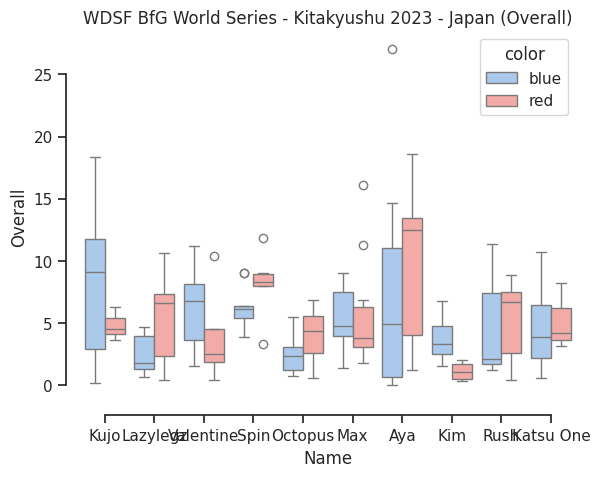

In [111]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
# join_st_qt_by_id

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Name", y="Overall",
             hue="color", palette=["b", "r"],
            data=event_temp_df).set_title(event+" (Overall)")
sns.despine(offset=10, trim=True)

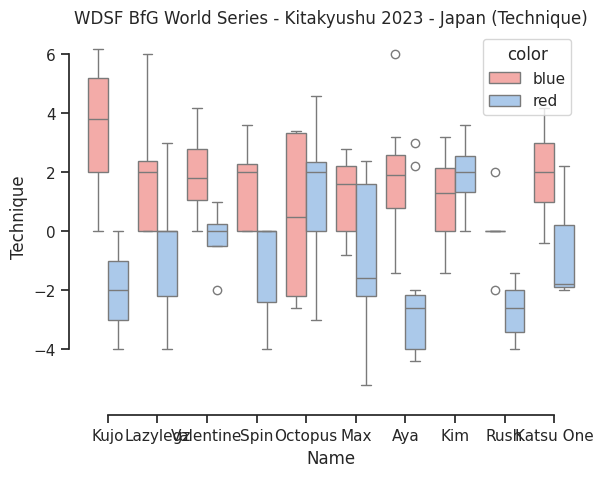

In [113]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
# join_st_qt_by_id

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Name", y="Technique",
             hue="color", palette=["r", "b"],
            data=event_temp_df).set_title(event+" (Technique)")
sns.despine(offset=10, trim=True)

**Judge bias**: Is a judge who is from the same geographic region or a member of the same crew as a competitor they are judging any more or less favorable in their voting towards that competitor?

**Judge distraction / fatigue**: Moving sliders on the judging interface takes attention away from watching the battle. Do some judges move fewer sliders? Are there differences in the votes between judges who move fewer sliders versus judges who move more sliders? Presumably moving more sliders requires more mental effort in deciding more scores,so does a judge who moves more sliders show signs of fatigue over time (perhaps gradually moving fewer sliders towards the end of the event or less consistent scoring towards end of event)?

**Variance of scores**: Do some categories show more variance among judges' submitted scores versus other categories? Would that suggest that judges have less agreement on the definitions of some categories?

**Count of judge votes**: Previously in 2-round battles, a 3rd round would be added if the results were tied with one roundwin per side. This was changed to be the winner of a 2-round battle being decided by count of individual judge votes.For example in the example below, left side wins the 1st round while right side wins the 2nd round, so in the previousformat there would need to be a 3rd round. With the changed format, left side wins at this point because they receiveda total of 6 judge votes versus right side receiving 4 judge votes. How many battles were impacted by this formatchange?

 **count of (battle rounds = 2) & (breaker 1 round wins = 1) & (breaker 2 round wins = 1)
/
count of (battle rounds = 2)**

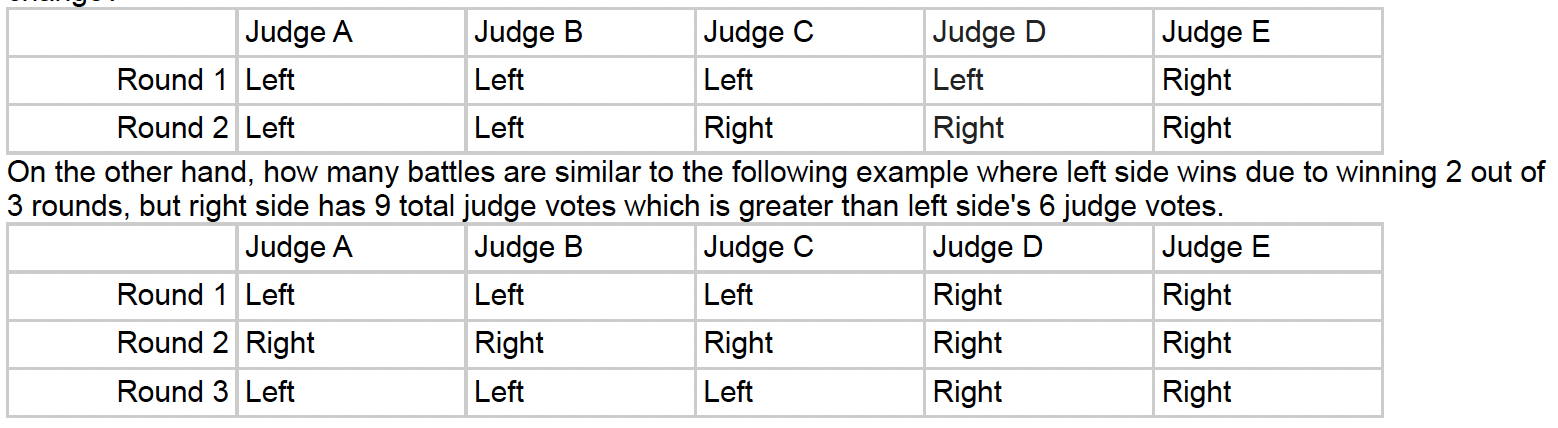

count of (battle rounds = 2) & (breaker 1 round wins = 1) & (breaker 2 round wins = 1)
/
count of (battle rounds = 2)


**Side bias** : If one side goes first, does losing percentage go up?